<a href="https://colab.research.google.com/github/kahaanpatel5/Stock-Market-Price-Predictor/blob/main/StockPredictorApproach_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install yfinance
import yfinance as yf
import numpy as np
import matplotlib as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
df=yf.download('^BSESN',start='2010-01-01')

[*********************100%***********************]  1 of 1 completed


In [6]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,17473.449219,17582.839844,17378.380859,17558.730469,17558.730469,28200
2010-01-05,17555.769531,17729.779297,17555.769531,17686.240234,17686.240234,27000
2010-01-06,17719.470703,17790.330078,17636.710938,17701.130859,17701.130859,21400
2010-01-07,17701.970703,17733.339844,17566.539062,17615.720703,17615.720703,18000
2010-01-08,17603.869141,17658.119141,17508.960938,17540.289062,17540.289062,17200
...,...,...,...,...,...,...
2022-07-06,53170.699219,53819.308594,53143.281250,53750.968750,53750.968750,14800
2022-07-07,54146.679688,54254.789062,53927.261719,54178.460938,54178.460938,7500
2022-07-08,54574.429688,54627.140625,54278.769531,54481.839844,54481.839844,7500


In [7]:
#Calculating returns based on the formula: Return=ln(((curr-prev)/prev)+1)
#Where, curr=Current price of stock & prev=Last day's price of stock
df['Returns']=np.log(df.Close.pct_change()+1)

In [8]:
#Creating a function for making n (n=lags) number of independent variables which will used to predict dependent variable
def lagit(df, lags):
    names = []
    for i in range(1,lags+1):
        df['Lag_'+str(i)]=df['Returns'].shift(i)
        names.append('Lag_'+str(i))
    return names

In [9]:
#Setting number of independent variables (lags)
lagnames=lagit(df,7)

In [10]:
#Printing lags
lagnames

['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5', 'Lag_6', 'Lag_7']

In [11]:
df

,Open,High,Low,Close,Adj Close,Volume,Returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7
Date,,,,,,,,,,,,,,
2010-01-04,17473.449219,17582.839844,17378.380859,17558.730469,17558.730469,28200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,17555.769531,17729.779297,17555.769531,17686.240234,17686.240234,27000,0.007236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,17719.470703,17790.330078,17636.710938,17701.130859,17701.130859,21400,0.000842,0.007236,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,17701.970703,17733.339844,17566.539062,17615.720703,17615.720703,18000,-0.004837,0.000842,0.007236,NaN,NaN,NaN,NaN,NaN
2010-01-08,17603.869141,17658.119141,17508.960938,17540.289062,17540.289062,17200,-0.004291,-0.004837,0.000842,0.007236,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-06,53170.699219,53819.308594,53143.281250,53750.968750,53750.968750,14800,0.011538,-0.001888,0.006159,-0.002096,-0.000151,-0.002834,0.000304,0.008184
2022-07-07,54146.679688,54254.789062,53927.261719,54178.460938,54178.460938,7500,0.007922,0.011538,-0.001888,0.006159,-0.002096,-0.000151,-0.002834,0.000304
2022-07-08,54574.429688,54627.140625,54278.769531,54481.839844,54481.839844,7500,0.005584,0.007922,0.011538,-0.001888,0.006159,-0.002096,-0.000151,-0.002834


In [12]:
#Dropping all the rows containing NA values
df.dropna(inplace=True)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
train,test=train_test_split(df, test_size=0.3, random_state=0, shuffle=False)

In [15]:
model=LinearRegression()

In [16]:
train

,Open,High,Low,Close,Adj Close,Volume,Returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7
Date,,,,,,,,,,,,,,
2010-01-14,17525.710938,17628.039062,17525.710938,17584.869141,17584.869141,23400,0.004278,0.004998,-0.005963,-0.000774,-0.004291,-0.004837,0.000842,0.007236
2010-01-15,17604.310547,17639.849609,17529.109375,17554.300781,17554.300781,17600,-0.001740,0.004278,0.004998,-0.005963,-0.000774,-0.004291,-0.004837,0.000842
2010-01-18,17538.720703,17712.599609,17505.500000,17641.080078,17641.080078,15400,0.004931,-0.001740,0.004278,0.004998,-0.005963,-0.000774,-0.004291,-0.004837
2010-01-19,17650.820312,17664.859375,17463.779297,17486.060547,17486.060547,13400,-0.008826,0.004931,-0.001740,0.004278,0.004998,-0.005963,-0.000774,-0.004291
2010-01-20,17486.689453,17590.589844,17425.050781,17474.490234,17474.490234,17000,-0.000662,-0.008826,0.004931,-0.001740,0.004278,0.004998,-0.005963,-0.000774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-04,35820.531250,35820.531250,35022.121094,35169.160156,35169.160156,21300,-0.022672,-0.015186,0.008220,-0.002675,-0.005986,-0.003000,0.009514,-0.014672
2018-10-05,35097.988281,35118.539062,34202.218750,34376.988281,34376.988281,22100,-0.022782,-0.022672,-0.015186,0.008220,-0.002675,-0.005986,-0.003000,0.009514
2018-10-08,34412.359375,34636.429688,33974.660156,34474.378906,34474.378906,20400,0.002829,-0.022782,-0.022672,-0.015186,0.008220,-0.002675,-0.005986,-0.003000


In [17]:
test

,Open,High,Low,Close,Adj Close,Volume,Returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7
Date,,,,,,,,,,,,,,
2018-10-11,34063.820312,34325.179688,33723.531250,34001.148438,34001.148438,30700,-0.022099,0.013363,-0.005087,0.002829,-0.022782,-0.022672,-0.015186,0.008220
2018-10-12,34291.921875,34808.421875,34279.781250,34733.578125,34733.578125,31300,0.021313,-0.022099,0.013363,-0.005087,0.002829,-0.022782,-0.022672,-0.015186
2018-10-15,34971.828125,35008.648438,34559.980469,34865.101562,34865.101562,10600,0.003779,0.021313,-0.022099,0.013363,-0.005087,0.002829,-0.022782,-0.022672
2018-10-16,35004.328125,35215.789062,34913.058594,35162.480469,35162.480469,12900,0.008493,0.003779,0.021313,-0.022099,0.013363,-0.005087,0.002829,-0.022782
2018-10-17,35543.378906,35605.429688,34727.160156,34779.578125,34779.578125,17700,-0.010949,0.008493,0.003779,0.021313,-0.022099,0.013363,-0.005087,0.002829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-06,53170.699219,53819.308594,53143.281250,53750.968750,53750.968750,14800,0.011538,-0.001888,0.006159,-0.002096,-0.000151,-0.002834,0.000304,0.008184
2022-07-07,54146.679688,54254.789062,53927.261719,54178.460938,54178.460938,7500,0.007922,0.011538,-0.001888,0.006159,-0.002096,-0.000151,-0.002834,0.000304
2022-07-08,54574.429688,54627.140625,54278.769531,54481.839844,54481.839844,7500,0.005584,0.007922,0.011538,-0.001888,0.006159,-0.002096,-0.000151,-0.002834


In [18]:
#Training the data
model.fit(train[lagnames], train['Returns'])

LinearRegression()

In [19]:
#Predicting returns of whole dataset (useless)
df['Prediction']=model.predict(df[lagnames])

In [20]:
#Predicting returns of test data only (usefull)
test['Prediction']=model.predict(test[lagnames])
test

,Open,High,Low,Close,Adj Close,Volume,Returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Prediction
Date,,,,,,,,,,,,,,,
2018-10-11,34063.820312,34325.179688,33723.531250,34001.148438,34001.148438,30700,-0.022099,0.013363,-0.005087,0.002829,-0.022782,-0.022672,-0.015186,0.008220,0.001579
2018-10-12,34291.921875,34808.421875,34279.781250,34733.578125,34733.578125,31300,0.021313,-0.022099,0.013363,-0.005087,0.002829,-0.022782,-0.022672,-0.015186,-0.001441
2018-10-15,34971.828125,35008.648438,34559.980469,34865.101562,34865.101562,10600,0.003779,0.021313,-0.022099,0.013363,-0.005087,0.002829,-0.022782,-0.022672,0.002076
2018-10-16,35004.328125,35215.789062,34913.058594,35162.480469,35162.480469,12900,0.008493,0.003779,0.021313,-0.022099,0.013363,-0.005087,0.002829,-0.022782,0.000548
2018-10-17,35543.378906,35605.429688,34727.160156,34779.578125,34779.578125,17700,-0.010949,0.008493,0.003779,0.021313,-0.022099,0.013363,-0.005087,0.002829,0.001070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-06,53170.699219,53819.308594,53143.281250,53750.968750,53750.968750,14800,0.011538,-0.001888,0.006159,-0.002096,-0.000151,-0.002834,0.000304,0.008184,0.000092
2022-07-07,54146.679688,54254.789062,53927.261719,54178.460938,54178.460938,7500,0.007922,0.011538,-0.001888,0.006159,-0.002096,-0.000151,-0.002834,0.000304,0.001072
2022-07-08,54574.429688,54627.140625,54278.769531,54481.839844,54481.839844,7500,0.005584,0.007922,0.011538,-0.001888,0.006159,-0.002096,-0.000151,-0.002834,0.000633


In [21]:
#Predicting whether the stock will go up or down (whole dataset)
df['Direction']=[1 if i>0 else -1 for i in df.Prediction]
#Giving magnitude to the direction predicted above (whole dataset)
df['Strategy']=df['Direction']*df['Returns']

In [22]:
#Predicting whether the stock will go up or down (test data)
test['Direction']=[1 if i>0 else -1 for i in test.Prediction]

In [23]:
#Giving magnitude to the direction predicted above (test data)
test['Strategy']=test['Direction']*test['Returns']

In [29]:
#Comparing actual growth of market vs predicted growth
np.exp(test[['Returns','Strategy']].sum())

Returns     1.550208
Strategy    1.230003
dtype: float64

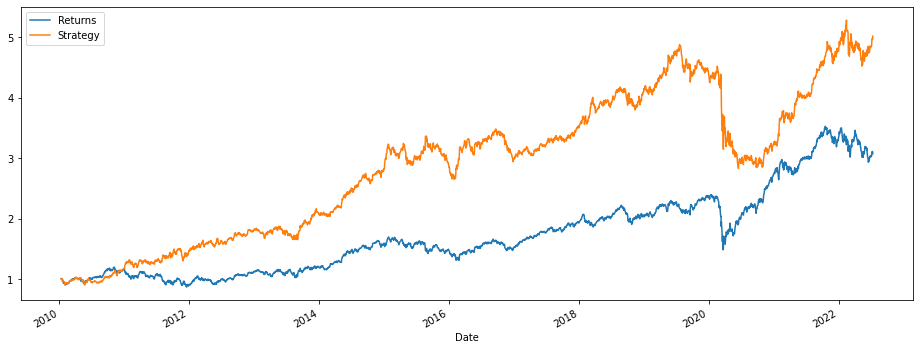

In [30]:
#Plotting graph of actual vs predicted (strategy) returns
np.exp(df[['Returns','Strategy']].cumsum()).plot(figsize=(16,6))

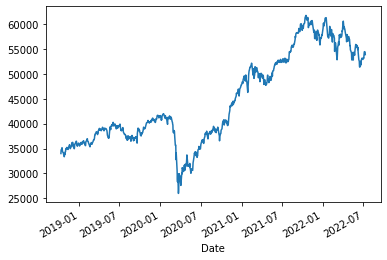

In [26]:
test['Close'].plot()

In [27]:
test

,Open,High,Low,Close,Adj Close,Volume,Returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,Lag_6,Lag_7,Prediction,Direction,Strategy
Date,,,,,,,,,,,,,,,,,
2018-10-11,34063.820312,34325.179688,33723.531250,34001.148438,34001.148438,30700,-0.022099,0.013363,-0.005087,0.002829,-0.022782,-0.022672,-0.015186,0.008220,0.001579,1,-0.022099
2018-10-12,34291.921875,34808.421875,34279.781250,34733.578125,34733.578125,31300,0.021313,-0.022099,0.013363,-0.005087,0.002829,-0.022782,-0.022672,-0.015186,-0.001441,-1,-0.021313
2018-10-15,34971.828125,35008.648438,34559.980469,34865.101562,34865.101562,10600,0.003779,0.021313,-0.022099,0.013363,-0.005087,0.002829,-0.022782,-0.022672,0.002076,1,0.003779
2018-10-16,35004.328125,35215.789062,34913.058594,35162.480469,35162.480469,12900,0.008493,0.003779,0.021313,-0.022099,0.013363,-0.005087,0.002829,-0.022782,0.000548,1,0.008493
2018-10-17,35543.378906,35605.429688,34727.160156,34779.578125,34779.578125,17700,-0.010949,0.008493,0.003779,0.021313,-0.022099,0.013363,-0.005087,0.002829,0.001070,1,-0.010949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-06,53170.699219,53819.308594,53143.281250,53750.968750,53750.968750,14800,0.011538,-0.001888,0.006159,-0.002096,-0.000151,-0.002834,0.000304,0.008184,0.000092,1,0.011538
2022-07-07,54146.679688,54254.789062,53927.261719,54178.460938,54178.460938,7500,0.007922,0.011538,-0.001888,0.006159,-0.002096,-0.000151,-0.002834,0.000304,0.001072,1,0.007922
2022-07-08,54574.429688,54627.140625,54278.769531,54481.839844,54481.839844,7500,0.005584,0.007922,0.011538,-0.001888,0.006159,-0.002096,-0.000151,-0.002834,0.000633,1,0.005584
